In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from  av.io import read
import pandas as pd
import datetime
import tensorflow as tf
from sklearn.preprocessing import normalize
from tensorflow import keras

In [2]:
def read_file(filename, lable=None):
    data, meta = read(" ".join(["a:" + str(i) for i in range(4)]), filename, 50)
    datapairs = list(zip(data, meta))
    
    df = pd.DataFrame()
    names = []
    col_name_tpls = []
    for sensor_data, stream_object in datapairs:
        meta_dict = stream_object.metadata
        print(meta_dict)
        name = meta_dict["NAME"]
        names.append(name)
        n_cols = len(sensor_data)
        col_names = []
        for i in range(n_cols):
            col_name = name + "_" + str(i)
            col_names.append(col_name)
            df[col_name] = pd.Series(sensor_data.T[:,i])
        col_name_tpls.append(col_names)
    df.index = pd.TimedeltaIndex(freq="20ms", start=0.0, periods=len(df))
    return df, col_name_tpls

def trim_data(data_frame, start=0.0, end=None):
    if end:
        df = data_frame[pd.Timedelta(10**9 * start):pd.Timedelta(10**9 * end)]
    else:
        df = data_frame[pd.Timedelta(10**9 * start):]
    return df

def cut_data(data_frame, cuts):
    df_cut_list = [] 
    for cut in cuts:
        df_i = data_frame[pd.Timedelta(10**9 * cut[0]):pd.Timedelta(10**9 * cut[1])]
        df_cut_list.append(df_i)
    return df_cut_list


def find_peaks(df, sensor, start=0.0, end=None, sel_method="right"):
    peaks = []
    if end:
        df = df[pd.Timedelta(10**9 * start):pd.Timedelta(10**9 * end)]
    else:
        df = df[pd.Timedelta(10**9 * start):]

    for i in df.index:
        value = df[sensor][i]
        if sel_method == "right":
            cond = value > 7
        elif sel_method == "left":
            cond = value < -1
        if cond:
            new = True
            for peak in peaks:
                if i - pd.Timedelta(10**9) < peak + pd.Timedelta(10**9):
                    new = False
                    break
            if new:
                peaks.append(i)
    cuts = []
    for peak in peaks:
        t = peak.value / 10 ** 9
        cuts.append((t-1, t+1))
    return cuts 

def normalize_cuts(cuts, sensor):
    normalized_cuts = np.matrix()
    for cut in cuts:
        cut = cut[sensor]
        cut = cut.values.reshape(-1,1)
        print(cut.shape)
        normed_matrix = normalize(cut, axis=0, norm='l1')
        normalized_cuts.append(normed_matrix, axis=0)
    return np.mat(normalized_cuts)


def plot_dataframe(df, col_name_tpls):
    for col_name_tpl in col_name_tpls:
        for col_name in col_name_tpl:
            fig = df[col_name].plot()
            fig.set_title(col_name)
            plt.show()

def plot_cuts(cuts, sensor):
    for cut in cuts:
        cut = cut[sensor]
        cut = cut.values.reshape(-1,1)
        print(cut.shape)
        normed_matrix = normalize(cut, axis=0, norm='l1')
        plt.plot(normed_matrix)
        plt.show()

{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.180000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.080000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}


/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


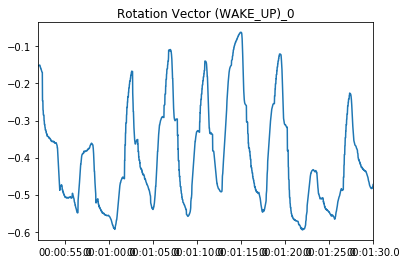

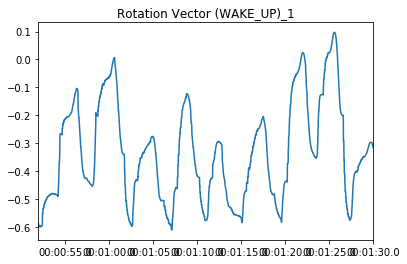

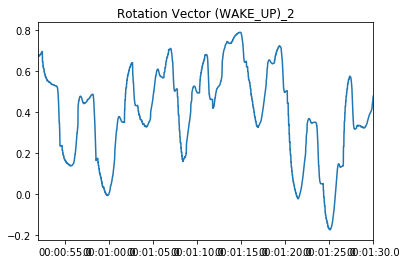

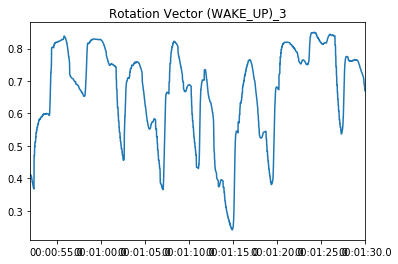

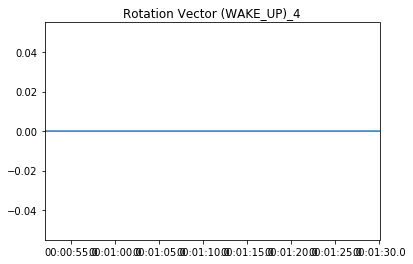

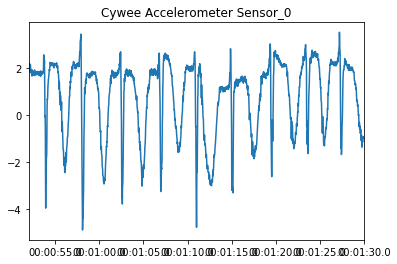

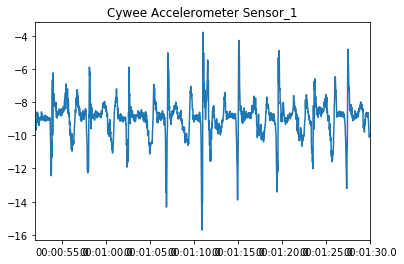

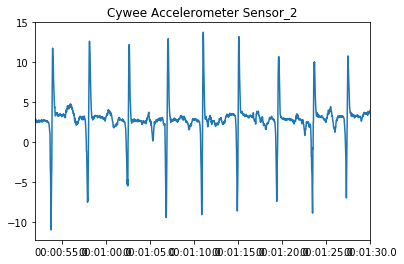

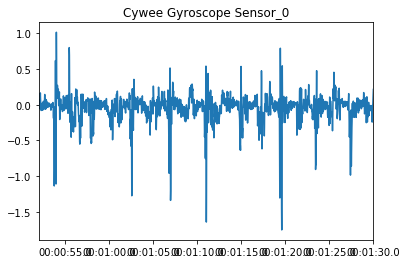

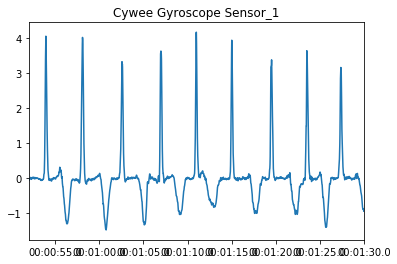

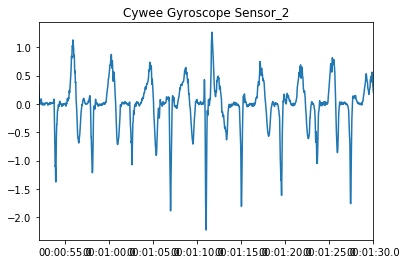

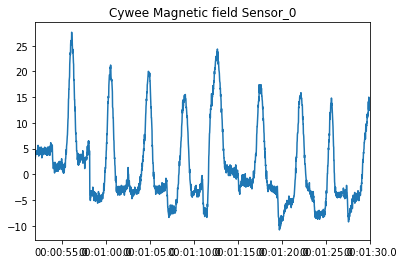

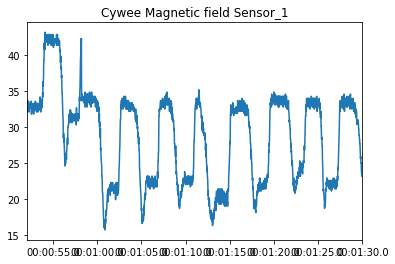

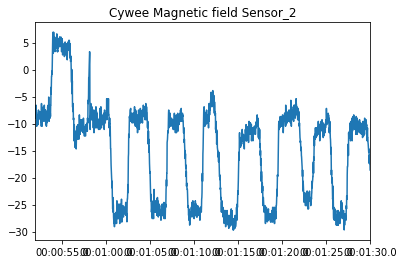

9 : [(52.94, 54.94), (57.1, 59.1), (61.6, 63.6), (66.02, 68.02), (70.02, 72.02), (74.06, 76.06), (78.58, 80.58), (82.62, 84.62), (86.44, 88.44)]
Found cuts: 9
(101, 1)


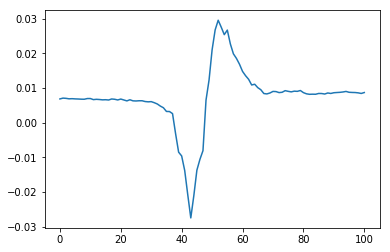

(101, 1)


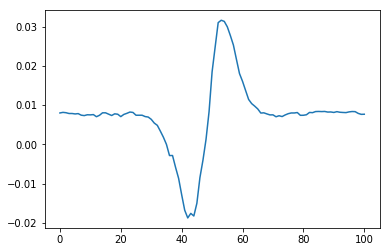

(101, 1)


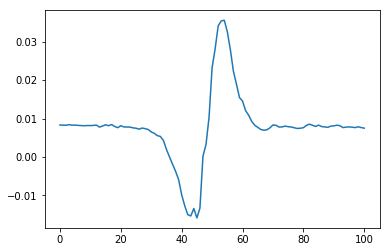

(100, 1)


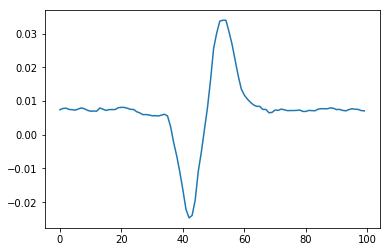

(101, 1)


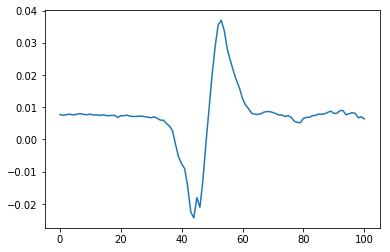

(101, 1)


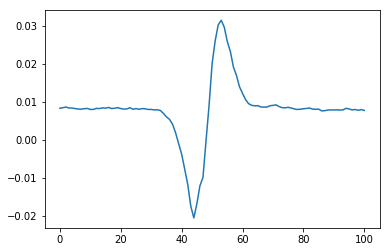

(101, 1)


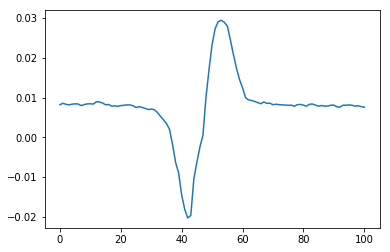

(101, 1)


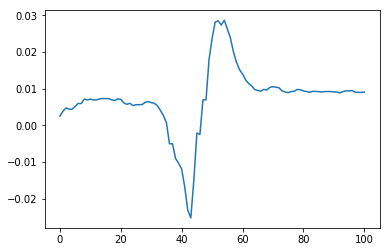

(101, 1)


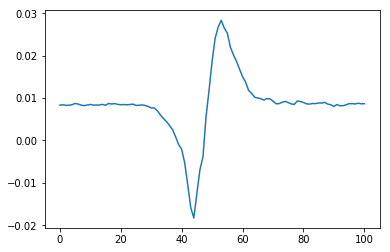

In [3]:
df, col_name_tpls = read_file("swipe_right_10_new.mkv")
trimed_df = trim_data(df, 52, 90)
plot_dataframe(trimed_df, col_name_tpls)
peaks = find_peaks(trimed_df, "Cywee Accelerometer Sensor_2")
print(len(peaks), ":", peaks)
cuts = cut_data(trimed_df, peaks)
print("Found cuts:", len(cuts))
plot_cuts(cuts, "Cywee Accelerometer Sensor_2")

In [4]:
def  learn_clisifyer(data, lable):
    print(data.shape)
    model = keras.Sequential([
        #keras.layers.Flatten(),
        #keras.layers.Flatten(input_shape=(28, 28)),
        #keras.layers.Dense(128, activation=tf.nn.relu),
        #keras.layers.Dense(2, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam', 
              loss='mean_absolute_error',
              metrics=['accuracy'])
    model.fit(data, [0]*len(data), epochs=5)

    



In [5]:
norm_cuts = normalize_cuts(cuts, "Cywee Accelerometer Sensor_2")
print(norm_cuts.shape)
#learn_clisifyer(norm_cuts, "")

TypeError: __new__() missing 1 required positional argument: 'data'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
print(train_images.shape)